# Imports

In [1]:
import os

from packages.mining import open_data
from packages.plotting import plot_data
from packages.computing import climatology, thresholds, quantiles

directory = os.chdir("/home/leopaul/Climate_Change_PO/")

# Relative humidity

## General view

In [2]:
sr = open_data(
    "data/FRNOR.RR2025010565429.PPDH.KEYuAAuu91dxAxu2BfU7xuA.csv",
    "U"
)

/home/leopaul/Climate_Change_PO/packages/mining.py:22: DtypeWarning: Columns (2,3,6,7,9,10,11,13,17,18,19,21,23,24,25,27,29,40,41,45,49,51,53,55,57,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep=';', encoding='utf-8')


DatetimeIndex(['1930-08-01 00:00:00', '1930-08-01 03:00:00',
               '1930-08-01 06:00:00', '1930-08-01 09:00:00',
               '1930-08-01 12:00:00', '1930-08-01 15:00:00',
               '1930-08-01 21:00:00', '1930-08-02 00:00:00',
               '1930-08-02 03:00:00', '1930-08-02 06:00:00',
               ...
               '2025-06-28 03:00:00', '2025-06-28 06:00:00',
               '2025-06-28 09:00:00', '2025-06-28 12:00:00',
               '2025-06-28 15:00:00', '2025-06-28 18:00:00',
               '2025-06-28 21:00:00', '2025-06-29 00:00:00',
               '2025-06-29 03:00:00', '2025-06-29 06:00:00'],
              dtype='datetime64[ns]', name='DATE', length=46223, freq=None)


In [3]:
sr_stdy = sr.loc["1960-01-01 00:00:00":"2019-12-31 23:00:00"]
dates_nan = sr_stdy[sr_stdy.isna()].index
nan_by_year = sr_stdy.isna().groupby(sr_stdy.index.year).sum()
nan_by_year = nan_by_year[nan_by_year != 0]
print(nan_by_year)
print(dates_nan)

DATE
1966     1
2005     2
2012     1
2013     2
2014     1
2016     3
2017     7
2019    45
Name: U, dtype: int64
DatetimeIndex(['1966-12-11 21:00:00', '2005-03-17 00:00:00',
               '2005-03-17 03:00:00', '2012-02-04 03:00:00',
               '2013-07-18 00:00:00', '2013-07-18 03:00:00',
               '2014-09-12 09:00:00', '2016-09-04 00:00:00',
               '2016-09-04 03:00:00', '2016-09-04 06:00:00',
               '2017-01-28 00:00:00', '2017-01-28 03:00:00',
               '2017-02-05 21:00:00', '2017-02-06 00:00:00',
               '2017-02-06 03:00:00', '2017-02-06 06:00:00',
               '2017-02-06 09:00:00', '2019-06-04 09:00:00',
               '2019-07-26 18:00:00', '2019-07-26 21:00:00',
               '2019-07-27 00:00:00', '2019-07-27 03:00:00',
               '2019-07-27 06:00:00', '2019-07-27 09:00:00',
               '2019-07-27 12:00:00', '2019-07-27 15:00:00',
               '2019-07-27 18:00:00', '2019-07-27 21:00:00',
               '2019-07-28 00:0

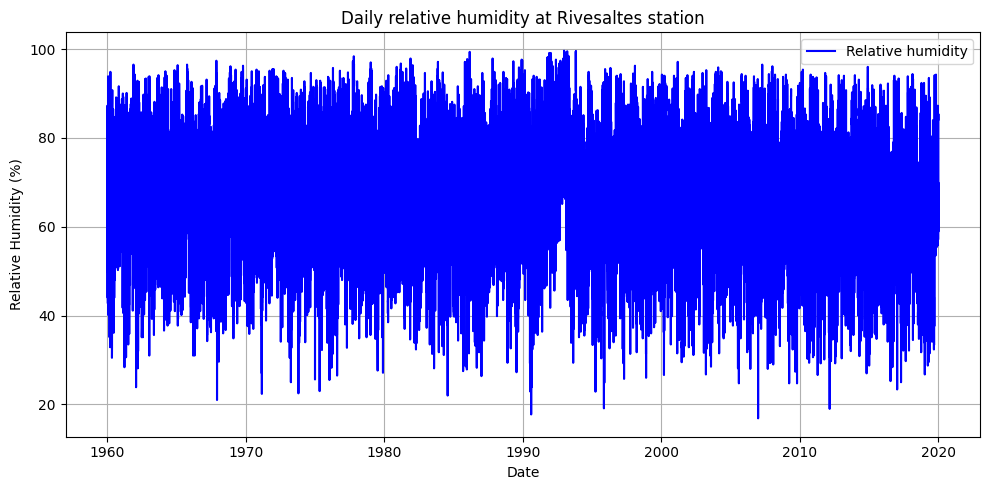

In [4]:
sr_d = sr_stdy.resample("D").mean()
plot_data(
    sr_d,
    "Relative humidity",
    "Daily relative humidity",
    "daily_humidity"
)

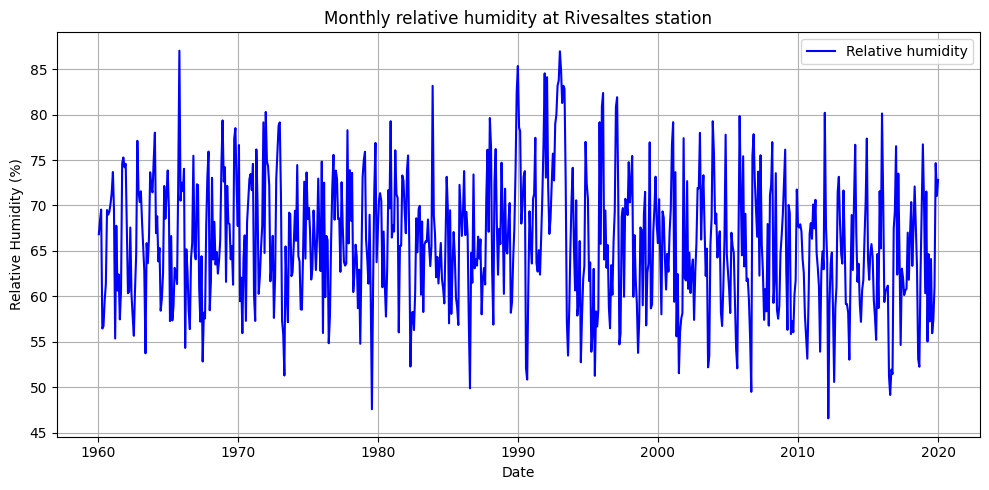

In [5]:
sr_m = sr_stdy.resample("ME").mean()
plot_data(
    sr_m,
    "Relative humidity",
    "Monthly relative humidity",
    "monthly_humidity"
)

## Climatology

### Normal

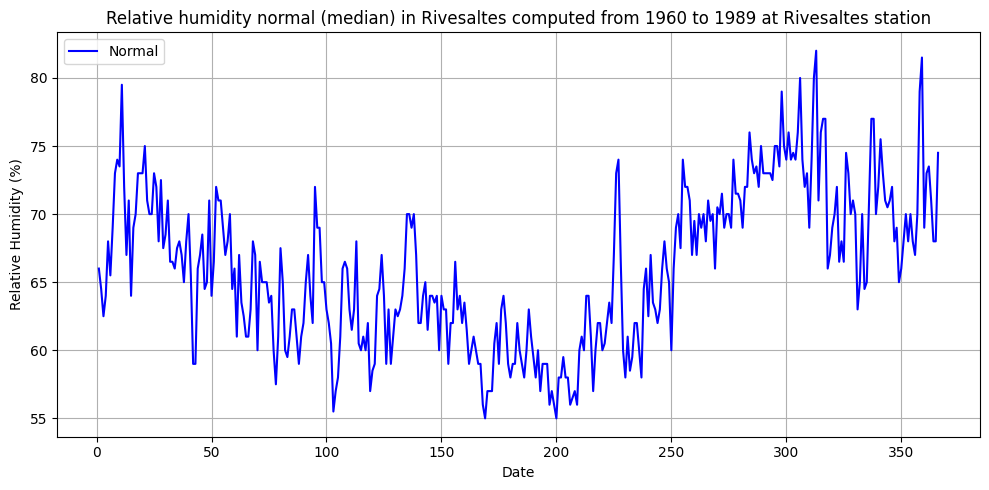

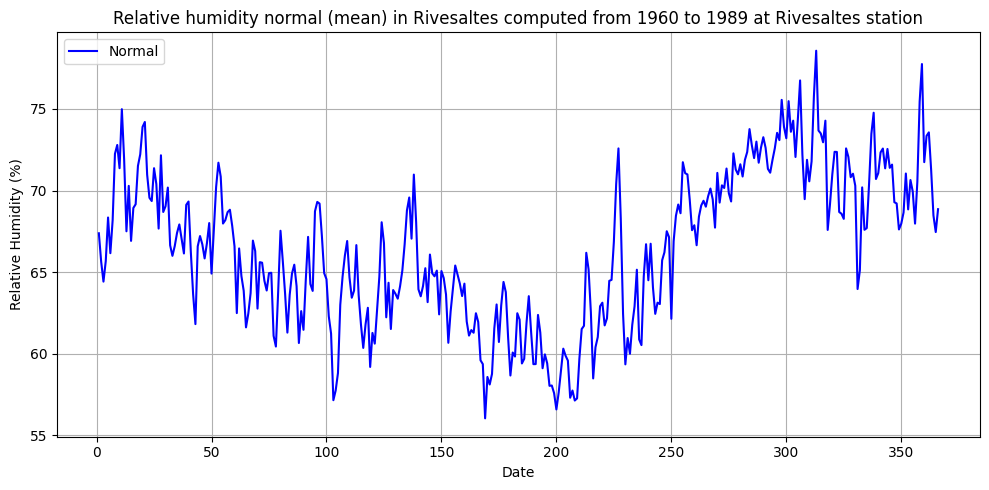

In [6]:
(sr_clim_frst_med, sr_clim_frst_mean) = climatology(
    sr_stdy,
    "1960-01-01 00:00:00",
    "1989-12-31 23:00:00",
    "Relative humidity"
)

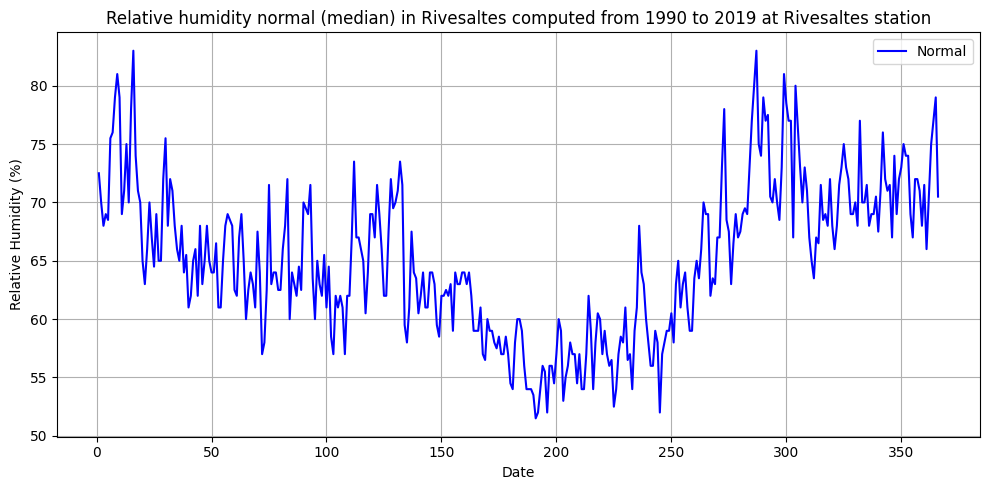

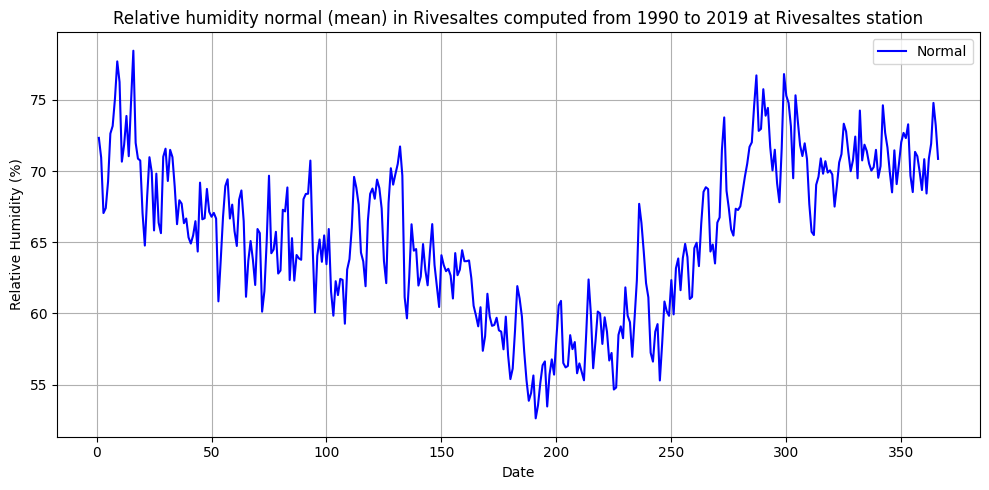

In [7]:
(sr_clim_frst_med, sr_clim_frst_mean) = climatology(
    sr_stdy,
    "1990-01-01 00:00:00",
    "2019-12-31 23:00:00",
    "Relative humidity"
)

### Quantiles

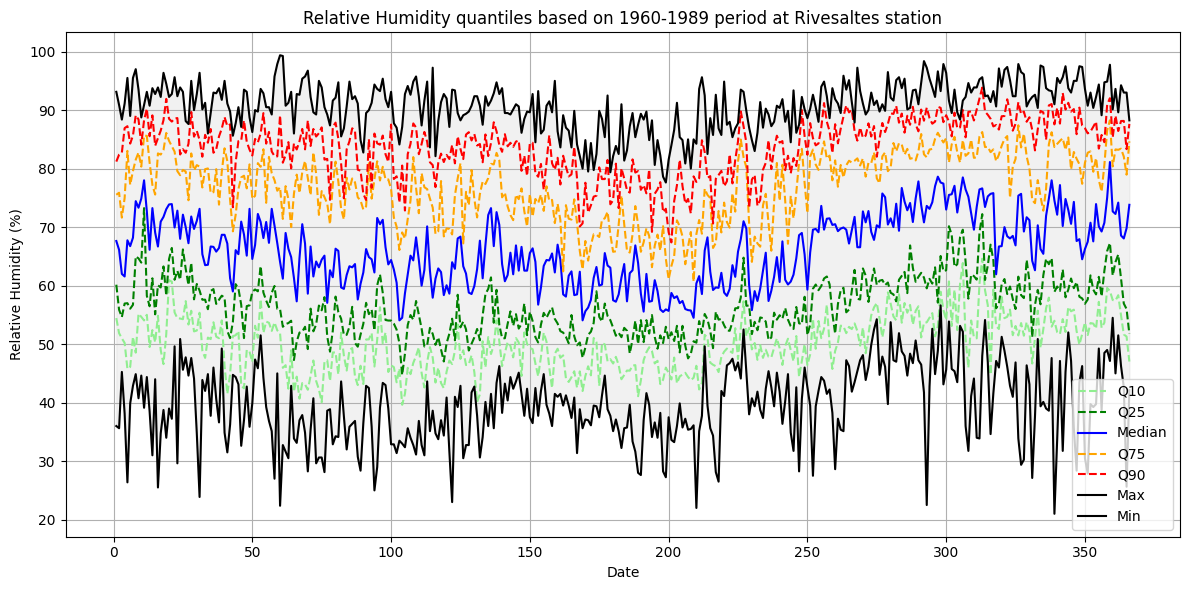

{'Q10': DATE
 1      54.4500
 2      51.8750
 3      50.9750
 4      50.2125
 5      45.7750
         ...   
 362    58.3625
 363    54.9125
 364    51.6625
 365    51.2875
 366    47.0250
 Name: U, Length: 366, dtype: float64,
 'Q25': DATE
 1      60.15625
 2      55.87500
 3      54.62500
 4      56.93750
 5      57.00000
          ...   
 362    65.31250
 363    61.21875
 364    56.93750
 365    56.00000
 366    51.75000
 Name: U, Length: 366, dtype: float64,
 'Q50': DATE
 1      67.6250
 2      66.1250
 3      62.0000
 4      61.5625
 5      67.7500
         ...   
 362    74.1875
 363    68.5625
 364    68.0625
 365    69.8125
 366    73.8125
 Name: U, Length: 366, dtype: float64,
 'Q75': DATE
 1      75.53125
 2      75.87500
 3      71.62500
 4      74.96875
 5      83.03125
          ...   
 362    83.21875
 363    83.40625
 364    82.06250
 365    78.96875
 366    84.65625
 Name: U, Length: 366, dtype: float64,
 'Q90': DATE
 1      81.2000
 2      82.3875
 3      82.7375
 4   

In [8]:
sr_frst = sr_stdy.loc["1960-01-01 00:00:00":"1989-12-31 23:00:00"]
sr_snd = sr_stdy.loc["1990-01-01 00:00:00":"2019-12-31 23:00:00"]
dic_quantiles = quantiles(
    sr_frst,
    "Relative Humidity quantiles based on 1960-1989 period at Rivesaltes station",
    "Relative Humidity (%)",
    "humidity/quantiles_1960_1989"
)

## Thresholds

Numbre of days with relative humidity > 95°C for 1960-1989 : 16
The corresponding dates are : [Timestamp('1965-01-31 00:00:00'), Timestamp('1971-12-06 00:00:00'), Timestamp('1972-01-07 00:00:00'), Timestamp('1979-01-05 00:00:00'), Timestamp('1979-01-08 00:00:00'), Timestamp('1979-01-22 00:00:00'), Timestamp('1981-02-28 00:00:00'), Timestamp('1982-01-18 00:00:00'), Timestamp('1985-12-25 00:00:00'), Timestamp('1986-02-27 00:00:00'), Timestamp('1986-02-28 00:00:00'), Timestamp('1989-12-01 00:00:00'), Timestamp('1989-12-08 00:00:00'), Timestamp('1989-12-09 00:00:00'), Timestamp('1989-12-14 00:00:00'), Timestamp('1989-12-15 00:00:00')]
Numbre of days with relative humidity > 95°C for 1990-2019 : 35
The corresponding dates are : [Timestamp('1990-02-24 00:00:00'), Timestamp('1991-12-30 00:00:00'), Timestamp('1992-01-02 00:00:00'), Timestamp('1992-01-03 00:00:00'), Timestamp('1992-01-06 00:00:00'), Timestamp('1992-01-07 00:00:00'), Timestamp('1992-01-11 00:00:00'), Timestamp('1992-01-12 00:00:

<Figure size 600x500 with 0 Axes>

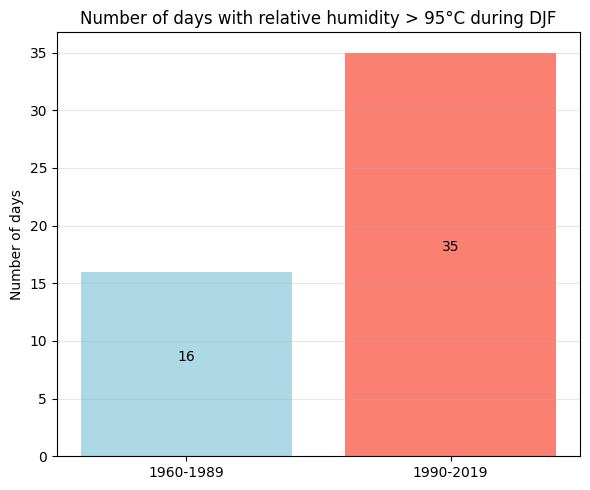

In [9]:
sr_frst_d = sr_d.loc["1960-01-01 00:00:00":"1989-12-31 23:00:00"]
sr_snd_d = sr_d.loc["1990-01-01 00:00:00":"2019-12-31 23:00:00"]
thresholds(
    variable="relative humidity",
    months=[12, 1, 2],
    months_letter="DJF",
    first_sr=sr_frst_d,
    second_sr=sr_snd_d,
    threshold=95,
    periods=["1960-1989", "1990-2019"],
    study_sign=">"
)